In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("train.csv", parse_dates = True)

test = pd.read_csv('TEST.csv', parse_dates = True)

In [3]:
train.columns = ['ds', 'y']

In [4]:
train

,ds,y
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142
...,...,...
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34


In [5]:
m = Prophet(seasonality_mode='additive',
                yearly_seasonality=True,
                changepoint_prior_scale=0.7,
                interval_width=0.90,
                seasonality_prior_scale=3,
                uncertainty_samples = 2000)

model = m.fit(train)

22:09:47 - cmdstanpy - INFO - Chain [1] start processing
22:09:48 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = m.make_future_dataframe(periods= 121, freq = 'M')
future.tail()

,ds
3260,2020-08-31
3261,2020-09-30
3262,2020-10-31
3263,2020-11-30
3264,2020-12-31


In [7]:
future.head()

,ds
0,1749-01-01
1,1749-02-01
2,1749-03-01
3,1749-04-01
4,1749-05-01


In [8]:
forecast = m.predict(future[-120:])

In [9]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-31,66.256110,-33.349748,171.177124,66.256110,66.256110,2.813141,2.813141,2.813141,2.813141,2.813141,2.813141,0.0,0.0,0.0,69.069252
1,2011-02-28,66.168405,-35.750228,172.787590,66.168405,66.168405,0.706071,0.706071,0.706071,0.706071,0.706071,0.706071,0.0,0.0,0.0,66.874476
2,2011-03-31,66.071302,-45.317571,162.597830,66.071302,66.071302,-3.140412,-3.140412,-3.140412,-3.140412,-3.140412,-3.140412,0.0,0.0,0.0,62.930890
3,2011-04-30,65.977332,-40.154181,167.832615,65.977332,65.977332,-5.302850,-5.302850,-5.302850,-5.302850,-5.302850,-5.302850,0.0,0.0,0.0,60.674483
4,2011-05-31,65.880229,-37.598092,170.395897,65.880229,65.880229,1.074234,1.074234,1.074234,1.074234,1.074234,1.074234,0.0,0.0,0.0,66.954464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2020-08-31,55.292917,-46.222442,163.885697,34.368669,73.219141,1.133425,1.133425,1.133425,1.133425,1.133425,1.133425,0.0,0.0,0.0,56.426342
116,2020-09-30,55.198947,-45.920250,168.780398,34.001395,73.404483,1.592451,1.592451,1.592451,1.592451,1.592451,1.592451,0.0,0.0,0.0,56.791398
117,2020-10-31,55.101844,-56.723104,153.593264,33.677109,73.624214,-5.620483,-5.620483,-5.620483,-5.620483,-5.620483,-5.620483,0.0,0.0,0.0,49.481361
118,2020-11-30,55.007874,-48.633639,159.146365,33.212624,73.829134,-0.417761,-0.417761,-0.417761,-0.417761,-0.417761,-0.417761,0.0,0.0,0.0,54.590112


In [10]:
test

,Month,Avg_sunspot_count
0,1/1/2011,27.3
1,2/1/2011,48.3
2,3/1/2011,78.6
3,4/1/2011,76.1
4,5/1/2011,58.2
...,...,...
115,8/1/2020,7.5
116,9/1/2020,0.6
117,10/1/2020,14.6
118,11/1/2020,34.5


In [11]:
train.tail()

,ds,y
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34
3143,12-01-2010,25


In [12]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2011-01-31,69.069252
1,2011-02-28,66.874476
2,2011-03-31,62.930890
3,2011-04-30,60.674483
4,2011-05-31,66.954464
...,...,...
115,2020-08-31,56.426342
116,2020-09-30,56.791398
117,2020-10-31,49.481361
118,2020-11-30,54.590112


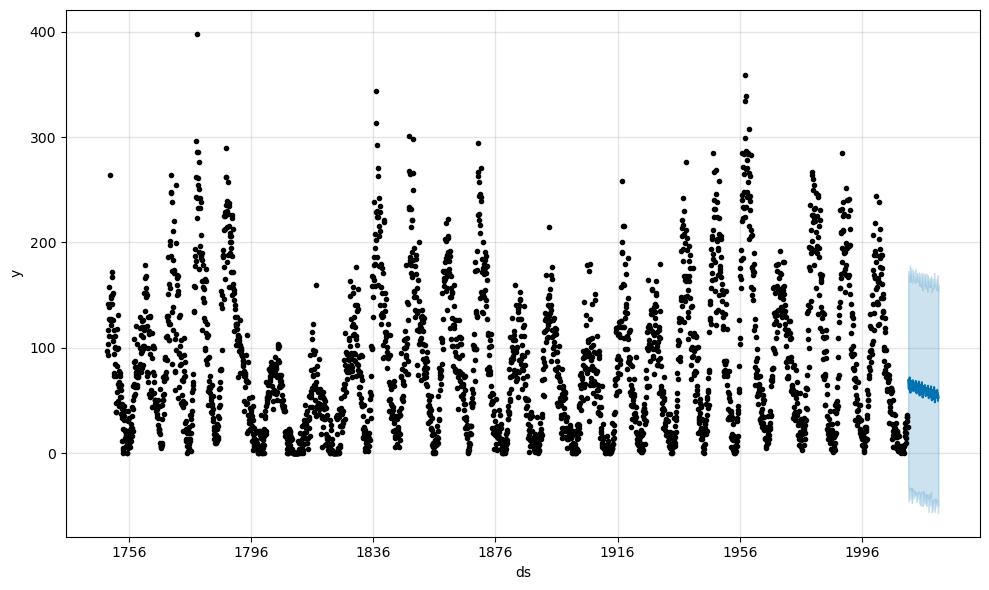

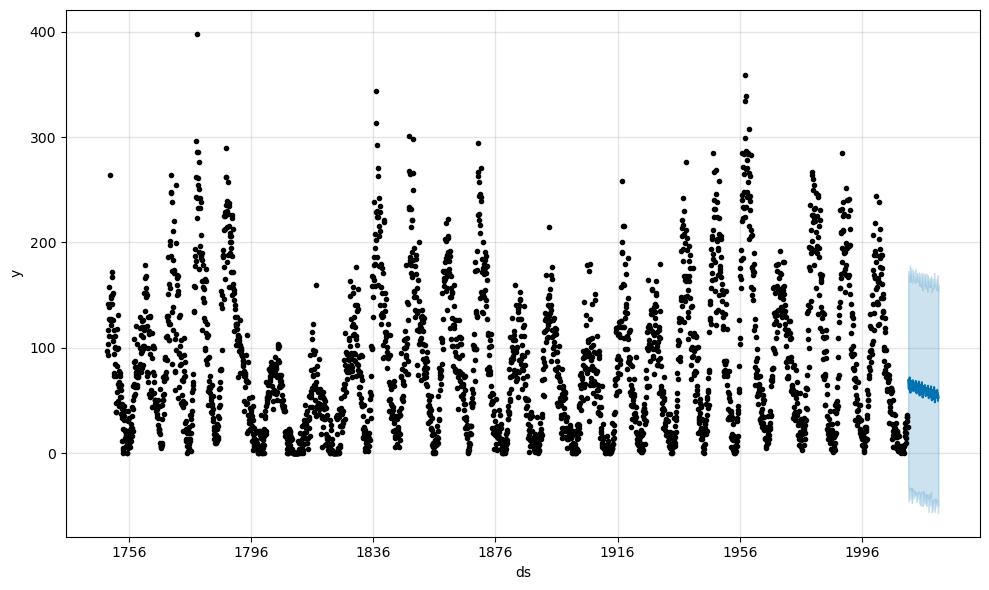

In [13]:
m.plot(forecast)

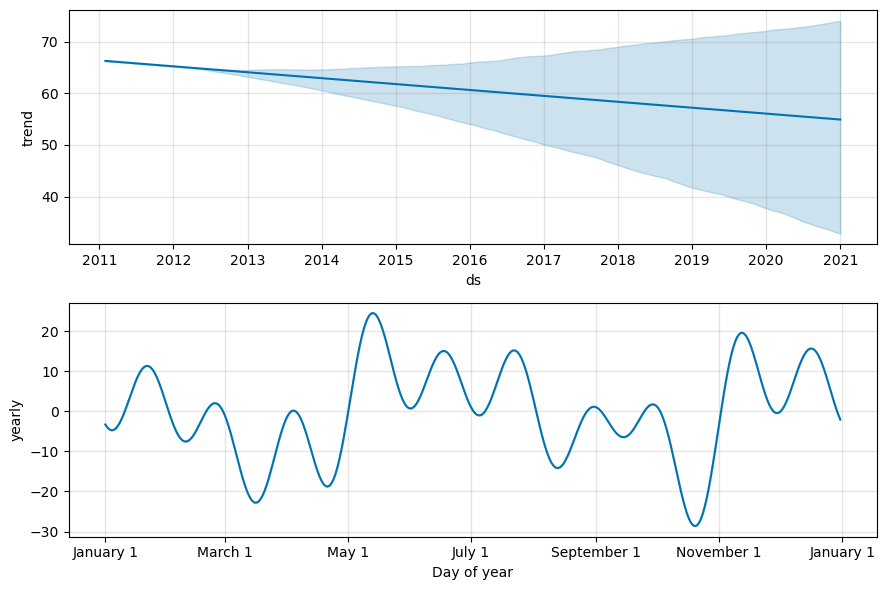

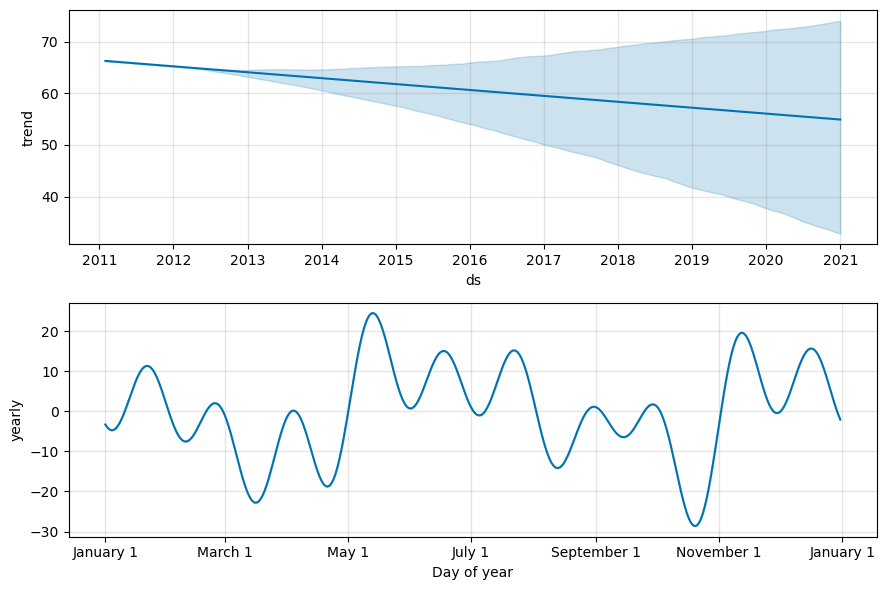

In [14]:
m.plot_components(forecast)

In [15]:
test["forecast"] = forecast['yhat']

In [16]:
test

,Month,Avg_sunspot_count,forecast
0,1/1/2011,27.3,69.069252
1,2/1/2011,48.3,66.874476
2,3/1/2011,78.6,62.930890
3,4/1/2011,76.1,60.674483
4,5/1/2011,58.2,66.954464
...,...,...,...
115,8/1/2020,7.5,56.426342
116,9/1/2020,0.6,56.791398
117,10/1/2020,14.6,49.481361
118,11/1/2020,34.5,54.590112


In [17]:
rmse = np.sqrt(mean_squared_error(test['Avg_sunspot_count'], test['forecast']))
rmse

40.478355593509015

<AxesSubplot:>

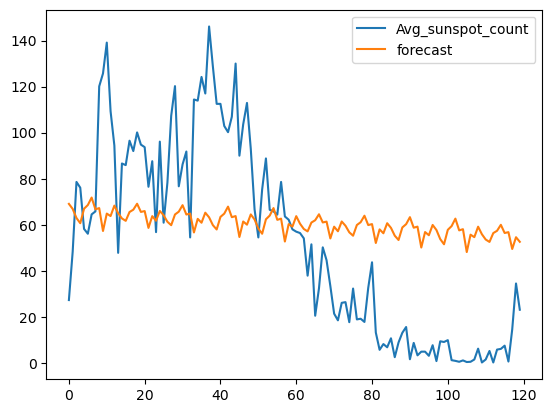

In [18]:
test[['Avg_sunspot_count', 'forecast']].plot()